# BGG Stats

There are a lot of different themes of board games.  Two of the most popular themes are Science Fiction and Fantasy.  The question that I have is if there is a statistical difference between the two themes average score or geek score.

### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys
sys.path.append("../data/")

In [2]:
df = pd.read_csv('../data/bgg_2.csv')

### Data Prep

In [35]:
# Create series with fantasy or scifi games
fantasy = df[['game_id', 'Fantasy']]
scifi = df[['game_id', 'Science Fiction']]

fantasy = fantasy[fantasy['Fantasy'] > 0]
f_game_id = fantasy.game_id.values

scifi = scifi[scifi['Science Fiction'] > 0]
s_game_id = scifi.game_id.values

df_fantasy = df.loc[df['game_id'].isin(f_game_id)]
fantasy_avg = df_fantasy['avg_rating']
fantasy_geek = df_fantasy['geek_rating']

df_scifi = df.loc[df['game_id'].isin(s_game_id)]
scifi_avg = df_scifi['avg_rating']
scifi_geek = df_scifi['geek_rating']

In [40]:
print('Avg rating for Fantasy game: {:.3f}'.format(df_fantasy['avg_rating'].mean()))
print('Avg rating for SciFi game: {:.3f}'.format(df_scifi['avg_rating'].mean()))

print('Geek Avg rating for Fantasy game: {:.3f}'.format(df_fantasy['geek_rating'].mean()))
print('Geek Avg rating for SciFi game: {:.3f}'.format(df_scifi['geek_rating'].mean()))

Avg rating for Fantasy game: 7.044
Avg rating for SciFi game: 7.103
Geek Avg rating for Fantasy game: 6.182
Geek Avg rating for SciFi game: 6.198


We see that the avg_rating and geek_rating between Fantasy and SciFi board games are very close.  Using bootstrp replicates we will see if there is a statistical difference between the two.

The null hypothesis is that there is no difference betweent the two themes of board games while hypothesis claims there is a difference.

H0 = fantasy ratings = scifi ratings OR fantasy ratings - scifi ratings = 0

Ha = fantasy ratings != scifi ratings

### Bootstrap

In [7]:
# DataQuest bootstrap functions
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, len(data)))

def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

In [8]:
# Bootstrap 10,000 replicates of the mean()
bs_mean_fantasy_avg = draw_bs_reps(fantasy_avg, np.mean, 10000)
bs_mean_fantasy_geek = draw_bs_reps(fantasy_geek, np.mean, 10000)

bs_mean_scifi_avg = draw_bs_reps(scifi_avg, np.mean, 10000)
bs_mean_scifi_geek = draw_bs_reps(scifi_geek, np.mean, 10000)

In [9]:
# difference of means
bs_mean_diff_avg = bs_mean_fantasy_avg - bs_mean_scifi_avg
bs_mean_diff_geek = bs_mean_fantasy_geek - bs_mean_scifi_geek

# 95% confidence interval
conf_int_95_avg = np.percentile(bs_mean_diff_avg, [2.5, 97.5])
conf_int_95_geek = np.percentile(bs_mean_diff_geek, [2.5, 97.5])

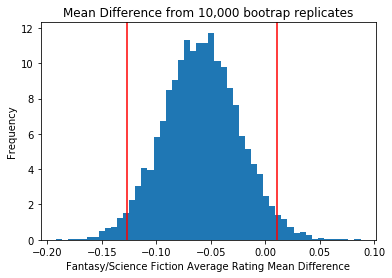

In [10]:
plt.hist(bs_mean_diff_avg, density=True, bins=50)
plt.axvline(x=conf_int_95_avg[0], color='r')
plt.axvline(x=conf_int_95_avg[1], color='r')
plt.xlabel('Fantasy/Science Fiction Average Rating Mean Difference')
plt.ylabel('Frequency')
plt.title('Mean Difference from 10,000 bootrap replicates');

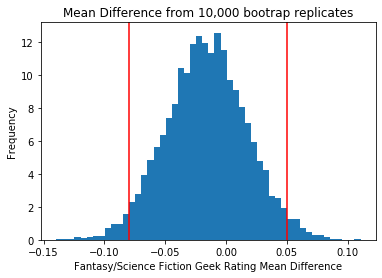

In [11]:
plt.hist(bs_mean_diff_geek, density=True, bins=50)
plt.axvline(x=conf_int_95_geek[0], color='r')
plt.axvline(x=conf_int_95_geek[1], color='r')
plt.xlabel('Fantasy/Science Fiction Geek Rating Mean Difference')
plt.ylabel('Frequency')
plt.title('Mean Difference from 10,000 bootrap replicates');

The above histograms is the mean difference in bootstap deviation of 10,000 samples.  The red lines mark the 95% confidenc interval.  We see that the 95% confidence interval does contain 0 on both avg_rating and geek_rating.  This means we can accept the null hypothesis that the avg_rating and geek_rating of the themes Fantasy and SciFi have no statitical difference.

In [12]:
def shifted_arrays(whole_data, data, func):
    return(data * func(whole_data) / func(data))

In [13]:
concate_data_avg = np.concatenate((fantasy_avg, scifi_avg))
concate_data_geek = np.concatenate((fantasy_geek, scifi_geek))

In [14]:
shifted_fantasy_avg = shifted_arrays(concate_data_avg, fantasy_avg, np.mean)
shifted_fantasy_geek = shifted_arrays(concate_data_geek, fantasy_geek, np.mean)

shifted_scifi_avg = shifted_arrays(concate_data_avg, scifi_avg, np.mean)
shifted_scifi_geek = shifted_arrays(concate_data_geek, scifi_geek, np.mean)

In [15]:
bs_mean_shifted_fantasy_avg = draw_bs_reps(shifted_fantasy_avg, np.mean, 10000)
bs_mean_shifted_fantasy_geek = draw_bs_reps(shifted_fantasy_geek, np.mean, 10000)

bs_mean_shifted_scifi_avg = draw_bs_reps(shifted_scifi_avg, np.mean, 10000)
bs_mean_shifted_scifi_geek = draw_bs_reps(shifted_scifi_geek, np.mean, 10000)

In [16]:
mean_diff_shifted_avg = bs_mean_shifted_fantasy_avg - bs_mean_shifted_scifi_avg
mean_diff_shifted_geek = bs_mean_shifted_fantasy_geek - bs_mean_shifted_scifi_geek

measured_mean_diff_avg = np.mean(fantasy_avg) - np.mean(scifi_avg)
measured_mean_diff_geek = np.mean(fantasy_geek) - np.mean(scifi_geek)

In [17]:
# Compute and print p-value
def find_p(bs_diff, measured_diff):
    return(np.sum(bs_diff >= measured_diff) / len(bs_diff))

In [18]:
p_avg = find_p(mean_diff_shifted_avg, measured_mean_diff_avg)
p_geek = find_p(mean_diff_shifted_geek, measured_mean_diff_geek)

print(p_avg, p_geek)

0.9534 0.6978


In [19]:
df_2017 = df[df['year'] == 2017]
df_2004 = df[df['year'] == 2004]

In [20]:
df_2004.describe()

,game_id,min_players,max_players,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,...,Economic,Exploration,Fantasy,Fighting,Medieval,Miniatures,Party Game,Science Fiction,combined_war,other_category
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,...,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,11735.482014,2.122302,4.546763,90.359712,95.971223,2004.0,6.795969,6.127984,3347.899281,10.485633,...,0.122302,0.100719,0.129496,0.115108,0.079137,0.093525,0.071942,0.057554,0.366906,1.000000
std,3445.846648,0.531070,1.908118,92.186878,97.491876,0.0,0.549388,0.506793,7329.592857,2.113571,...,0.328819,0.302045,0.336963,0.320306,0.270928,0.292220,0.259327,0.233740,0.723757,0.992727
min,2651.000000,1.000000,2.000000,15.000000,15.000000,2004.0,5.792010,5.643470,90.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9769.500000,2.000000,4.000000,30.000000,30.000000,2004.0,6.322440,5.739130,445.500000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11202.000000,2.000000,4.000000,60.000000,60.000000,2004.0,6.767460,5.933380,872.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,13004.500000,2.000000,6.000000,120.000000,120.000000,2004.0,7.166370,6.432610,2660.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000
max,39332.000000,4.000000,10.000000,480.000000,480.000000,2004.0,8.261290,7.827220,55115.000000,14.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000


In [21]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, len(data)))

In [22]:
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

In [23]:
# Generate Shifted arrays
def shifted_arrays(data, stat_data, stat):
    return(data - stat(data) + stat_data)

In [24]:
# A two sample boostrap hypothesis for difference
def bootstrap_differences(data_1, data_2, stat, size=1):
    # Concatenate forces: forces_concat
    data_concat = np.concatenate((data_1, data_2))
    
    # Compute stat of all data
    stat_data = stat(data_concat)
    
    # Generate Shifted arrays
    data_1_shifted = shifted_arrays(data_1, stat_data, stat)
    data_2_shifted = shifted_arrays(data_2, stat_data, stat)

    # Compute size bootstrap replicates from shifted arrays
    bs_data_1 = draw_bs_reps(data_1_shifted, stat, size)
    bs_data_2 = draw_bs_reps(data_2_shifted, stat, size)
    
    # Get replicates of difference of stat
    bs_replicated = bs_data_1 - bs_data_2
    
    return bs_replicated

In [25]:
geek_rating_2004 = df_2004['geek_rating']
geek_rating_2017 = df_2017['geek_rating']

avg_rating_2004 = df_2004['geek_rating']
avg_rating_2017 = df_2017['geek_rating']

In [26]:
bs_geek_rating_mean = bootstrap_differences(geek_rating_2004, geek_rating_2017, np.mean, 10000)
bs_avg_rating_mean = bootstrap_differences(avg_rating_2004, avg_rating_2017, np.mean, 10000)

In [27]:
# Compute difference of stat impact data from experiment
def diff_of_stat(data_1, data_2, stat):
    return stat(data_1) - stat(data_2)

In [28]:
# Compute and print p-value
def find_p(data, diff_stat):
    return(np.sum(data >= diff_stat) / len(data))

In [29]:
emp_diff_mean_geek = diff_of_stat(geek_rating_2004, geek_rating_2017, np.mean)
geek_p = find_p(bs_geek_rating_mean, emp_diff_mean_geek)
geek_p

0.2801

In [30]:
emp_diff_mean_avg = diff_of_stat(avg_rating_2004, avg_rating_2017, np.mean)
avg_p = find_p(bs_avg_rating_mean, emp_diff_mean_avg)
avg_p

0.284

In [31]:
geek_boot_mean_2004 = draw_bs_reps(geek_rating_2004, np.mean, 10000)
geek_boot_mean_2017 = draw_bs_reps(geek_rating_2017, np.mean, 10000)

In [32]:
mean_diff_geek = geek_boot_mean_2004 - geek_boot_mean_2017

In [33]:
gbm_2004 = np.mean(geek_boot_mean_2004)
gbm_2017 = np.mean(geek_boot_mean_2017)
mdg = np.mean(mean_diff_geek)

Text(0.5, 0, 'Mean Charges')

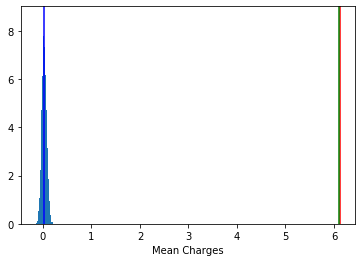

In [34]:
plt.hist(mean_diff_geek, density=True, bins=50)
plt.axvline(x=gbm_2004, color='r')
plt.axvline(x=gbm_2017, color='g')
plt.axvline(x=mdg, color='b')
plt.xlabel('Mean Charges')